Accuracy and Runtime with respect to Number of Pieces

In [1]:
import numpy as np
import math
import sys
import statistics
import csv
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = [5.50, 3.50]
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=10)

In [28]:
def pieces_time(benchmark_name, ll, ul):
    filehandle = open("../" + benchmark_name + "/results.txt")
    lines = filehandle.readlines()
    bits = int(float(lines[-1].split(",")[0]))

    fig, ax = plt.subplots()
    ax.set_xscale("log", base=2)
    ax.set_xlabel("# Linear Pieces")
    ax.set_ylabel("Time (s)")
    ax.set_title(benchmark_name)

    legend_list = []
    for i in range(ll, ul+1):
        cur = []
        for j in lines:
            if int(float(j.split(",")[0])) == i:
                cur.append(j)
        
        x = []
        y = []
        for j in cur:
            cur_split = j.split(",")
            x.append(int(float(cur_split[1])))
            y.append((float(cur_split[-1])))
        ax.plot(x, y)
        legend_list.append("b = " + str(i))

    ax.legend(legend_list, loc="upper left")
    fig.savefig("../" + benchmark_name + "/time.png", dpi=300, bbox_inches="tight")

def pieces_accuracy(benchmark_name, ll, ul):
    filehandle = open("../" + benchmark_name + "/results.txt")
    lines = filehandle.readlines()
    bits = int(float(lines[-1].split(",")[0]))
    
    fig, ax = plt.subplots()
    ax.set_xscale("log", base=2)
    ax.set_yscale("log")
    ax.set_xlabel("# Linear Pieces")
    ax.set_ylabel("Result (s)")
    ax.set_title(benchmark_name)
    
    legend_list = []
    for i in range(ll, ul+1):
        cur = []
        for j in lines:
            if int(float(j.split(",")[0])) == i:
                cur.append(j)
        
        x = []
        y = []
        for j in cur:
            cur_split = j.split(",")
            x.append(int(float(cur_split[1])))
            y.append(abs((float(cur_split[-2]))- param_bench[benchmark_name]["gt"]))
        ax.plot(x[1:], y[1:])
        legend_list.append("b = " + str(i))

    ax.legend(legend_list, loc="upper right")
    fig.savefig("../" + benchmark_name + "/accuracy.png", dpi=300, bbox_inches="tight")

In [29]:
param_bench = {}
param_bench["weekend"] = {"ll": 15, "ul": 19, "gt":0.3742061754266954}
param_bench["altermu2"] = {"ll": 5, "ul": 10, "gt":0.1550617483}
param_bench["addFun_max"] = {"ll": 13, "ul": 18, "gt": 1/math.sqrt(math.pi)}
param_bench["spacex"] = {"ll": 6, "ul": 10, "gt": 30.00463476991299}

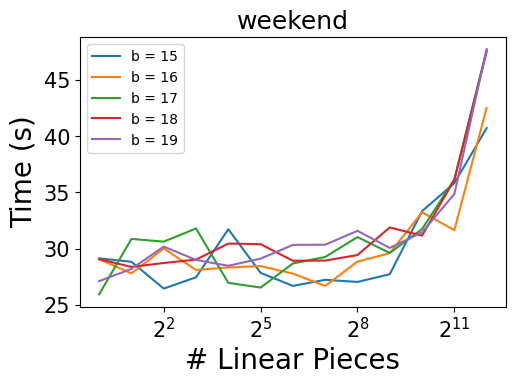

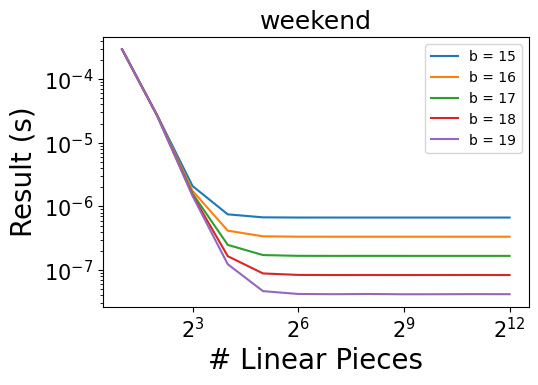

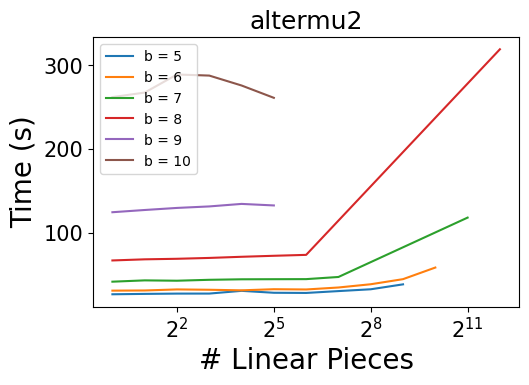

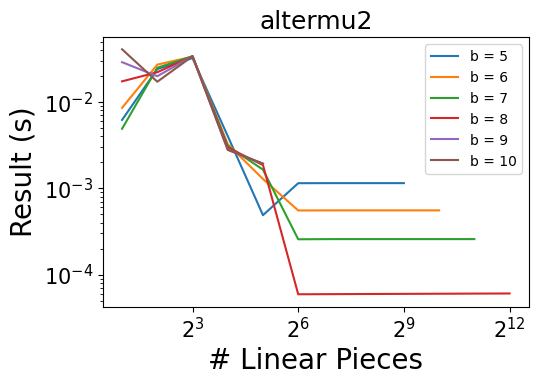

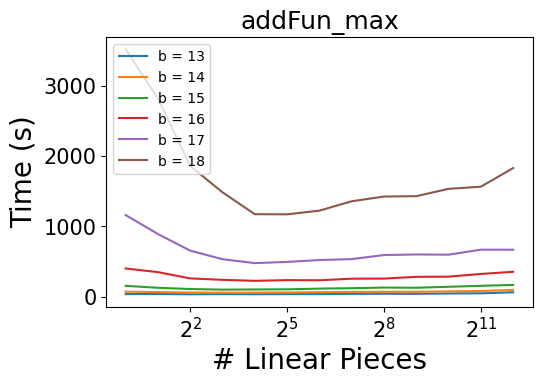

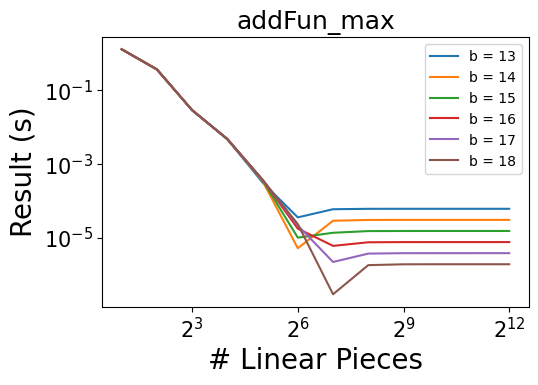

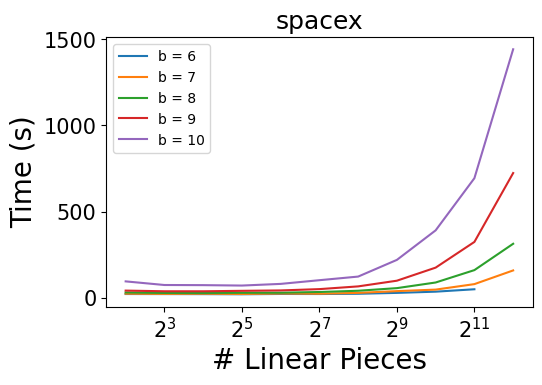

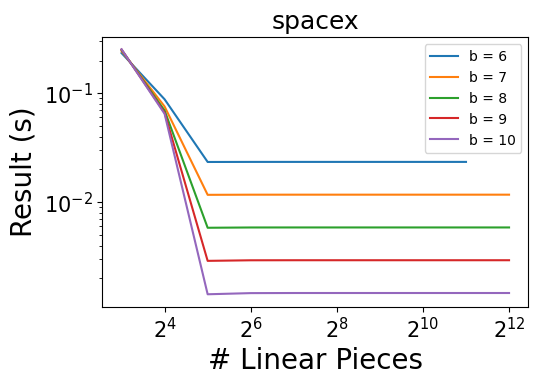

In [30]:
for i in param_bench:
    k = i
    v = param_bench[k]
    pieces_time(k, v["ll"], v["ul"])
    pieces_accuracy(k, v["ll"], v["ul"])